---
title: "추천 시스템 스터디 실습 예제 2"
author: "Sangkon Han"
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


import statsmodels.api as sm

In [2]:
trans2022 = pd.read_excel(
    "data/raw-data.xlsx", "2022", index_col="in/out", na_values=["NA"]
)
population = pd.read_excel("data/raw-data.xlsx", "population", index_col="local/year")
birth = pd.read_excel("data/raw-data.xlsx", "birth", index_col="local/year")
death = pd.read_excel("data/raw-data.xlsx", "death", index_col="local/year")

In [3]:
trans2022.head()

,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Gyeonggi\n-do,Gangwon\n-do,Chungcheong\nbuk-do,Chungcheong\nnam-do,Jeollabuk\n-do,Jeollanam\n-do,Gyeongsang\nbuk-do,Gyeongsang\nnam-do,Jeju-do
in/out,,,,,,,,,,,,,,,,,
Seoul,523992,10011,6782,32297,5448,8967,3171,3707,201762,15338,10069,14799,8855,8418,9687,9117,6942
Busan,17668,188193,4101,2284,895,1802,7250,629,13168,1573,1612,2306,1130,2533,7073,34238,1928
Daegu,12887,4413,118457,1654,469,1883,2296,642,10564,1329,1752,1971,723,817,32032,5922,1053
Incheon,27438,1702,1196,151238,1154,1927,651,678,43640,3954,3208,6182,2322,2353,2660,2104,1645
Gwangju,8958,910,459,1540,84311,1244,292,466,7504,631,819,1598,4151,23237,670,888,778


In [4]:
population.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
local/year,,,,,,,,,,,
Seoul,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372
Busan,3538484,3527635,3519401,3513777,3498529,3470653,3441453,3413841,3391946,3350380,3317812
Daegu,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031,2418346,2385412,2363691
Incheon,2843981,2879782,2902608,2925815,2943069,2948542,2954642,2957026,2942828,2948375,2967314
Gwangju,1469216,1472910,1475884,1472199,1469214,1463770,1459336,1456468,1450062,1441611,1431050


In [5]:
birth.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
local/year,,,,,,,,,,,
Seoul,93914,84066,83711,83005,75536,65389,58074,53673,47445,45531,42602
Busan,28673,25831,26190,26645,24906,21480,19152,17049,15058,14446,14134
Daegu,21472,19340,19361,19438,18298,15946,14400,13233,11193,10661,10134
Incheon,27781,25560,25786,25491,23609,20445,20087,18522,16040,14947,14464
Gwangju,14392,12729,12729,12441,11580,10120,9105,8364,7318,7956,7446


In [6]:
death.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
local/year,,,,,,,,,,,
Seoul,41514,42063,42153,43053,43540,42932,45219,43829,45522,48798,55296
Busan,20534,20096,20230,20820,21074,21434,22570,22260,22950,23531,27713
Daegu,12352,12531,12642,13081,13502,13629,14070,13752,14460,14560,17592
Incheon,12881,13039,13409,13452,14119,14290,15316,15131,15689,16493,18957
Gwangju,6874,6891,6935,7443,7247,7560,7781,7635,7785,7981,9350


In [7]:
population2012 = population.iloc[:, 0]
population2013 = population.iloc[:, 1]
population2014 = population.iloc[:, 2]
population2015 = population.iloc[:, 3]
population2016 = population.iloc[:, 4]
population2017 = population.iloc[:, 5]
population2018 = population.iloc[:, 6]
population2019 = population.iloc[:, 7]
population2020 = population.iloc[:, 8]
population2021 = population.iloc[:, 9]
population2022 = population.iloc[:, 10]

In [8]:
# for i in range(11):
#     globals()[f"population{2012+i}"] = population.iloc[:, i]

In [9]:
birth2012 = birth.iloc[:, 0]
birth2013 = birth.iloc[:, 1]
birth2014 = birth.iloc[:, 2]
birth2015 = birth.iloc[:, 3]
birth2016 = birth.iloc[:, 4]
birth2017 = birth.iloc[:, 5]
birth2018 = birth.iloc[:, 6]
birth2019 = birth.iloc[:, 7]
birth2020 = birth.iloc[:, 8]
birth2021 = birth.iloc[:, 9]
birth2022 = birth.iloc[:, 10]

In [10]:
death2012 = death.iloc[:, 0]
death2013 = death.iloc[:, 1]
death2014 = death.iloc[:, 2]
death2015 = death.iloc[:, 3]
death2016 = death.iloc[:, 4]
death2017 = death.iloc[:, 5]
death2018 = death.iloc[:, 6]
death2019 = death.iloc[:, 7]
death2020 = death.iloc[:, 8]
death2021 = death.iloc[:, 9]
death2022 = death.iloc[:, 10]

In [11]:
trans2012 = pd.read_excel(
    "data/raw-data.xlsx", "2012", index_col="in/out", na_values=["NA"]
)
trans2013 = pd.read_excel(
    "data/raw-data.xlsx", "2013", index_col="in/out", na_values=["NA"]
)
trans2014 = pd.read_excel(
    "data/raw-data.xlsx", "2014", index_col="in/out", na_values=["NA"]
)
trans2015 = pd.read_excel(
    "data/raw-data.xlsx", "2015", index_col="in/out", na_values=["NA"]
)
trans2016 = pd.read_excel(
    "data/raw-data.xlsx", "2016", index_col="in/out", na_values=["NA"]
)
trans2017 = pd.read_excel(
    "data/raw-data.xlsx", "2017", index_col="in/out", na_values=["NA"]
)
trans2018 = pd.read_excel(
    "data/raw-data.xlsx", "2018", index_col="in/out", na_values=["NA"]
)
trans2019 = pd.read_excel(
    "data/raw-data.xlsx", "2019", index_col="in/out", na_values=["NA"]
)
trans2020 = pd.read_excel(
    "data/raw-data.xlsx", "2020", index_col="in/out", na_values=["NA"]
)
trans2021 = pd.read_excel(
    "data/raw-data.xlsx", "2021", index_col="in/out", na_values=["NA"]
)
trans2022 = pd.read_excel(
    "data/raw-data.xlsx", "2022", index_col="in/out", na_values=["NA"]
)

## 분석

- 시도별 2012년 인구 이동, 시도별 인구, 시도별 출생, 시도별 사망에 대한 데이터를 로드한다. 일부 데이터를 시각화
- Pandas는 다양한 시각화 도구를 제공, 아주 세밀하거나 대화형 시각화는 일부 부족한 면이 있지만 데이터의 경향이나 분포를 파악하는데 부가 작업이 필요 없이 사용할 수 있다는 장점

<Axes: title={'center': 'Birth'}, xlabel='local/year'>

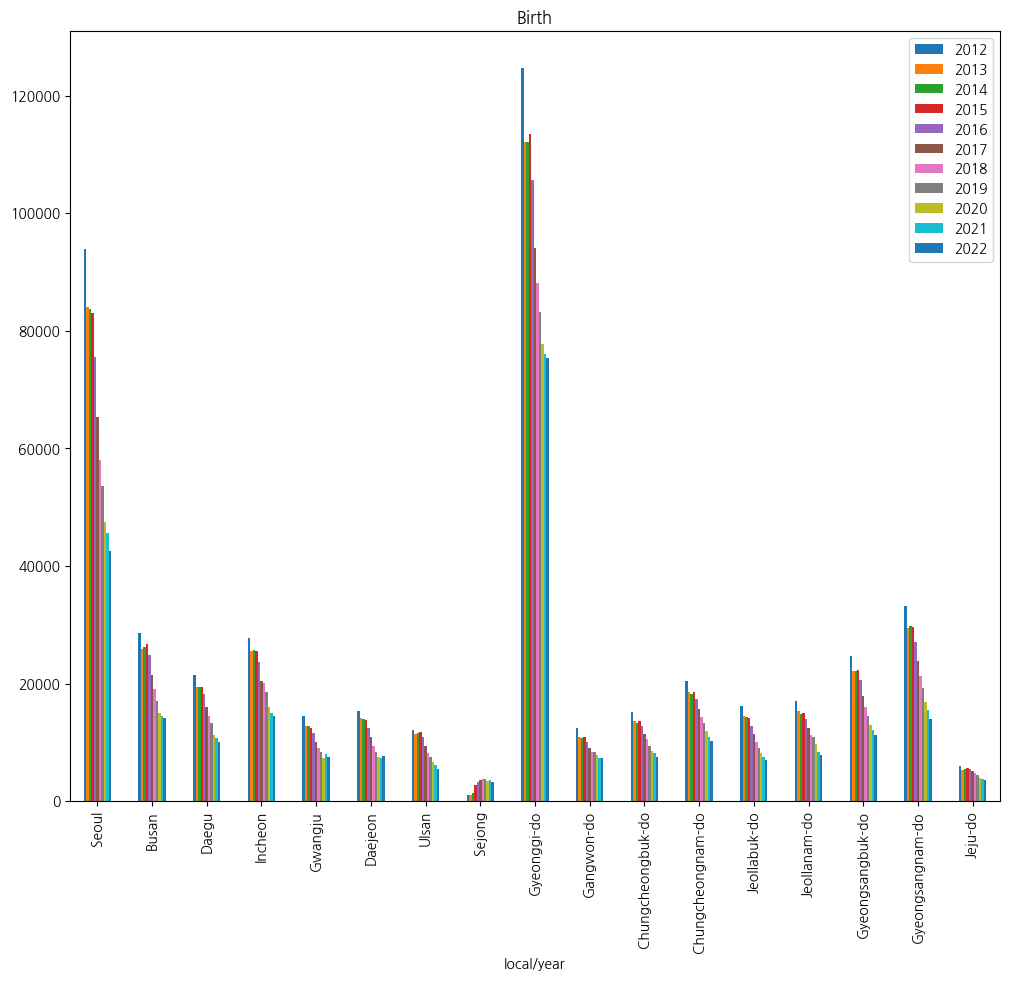

In [12]:
birth.plot(kind="bar", figsize=(12, 10), title="Birth")

<Axes: title={'center': 'Death'}, xlabel='local/year'>

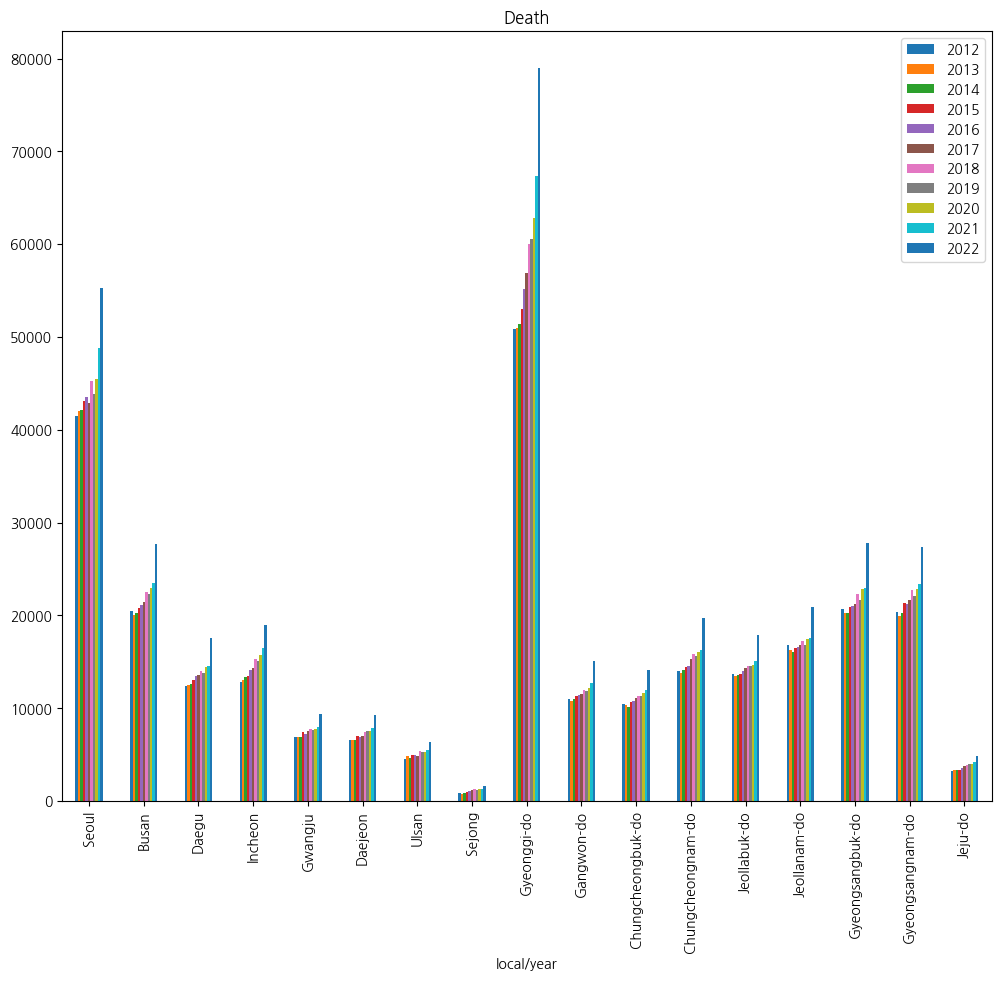

In [13]:
death.plot(kind="bar", figsize=(12, 10), title="Death")

- 2012년 이후, 서울, 경기도, 경상남도 등에서 출생 명수가 줄어드는 것이 확연 => 시도별은?

<Axes: title={'center': 'Population'}, xlabel='local/year'>

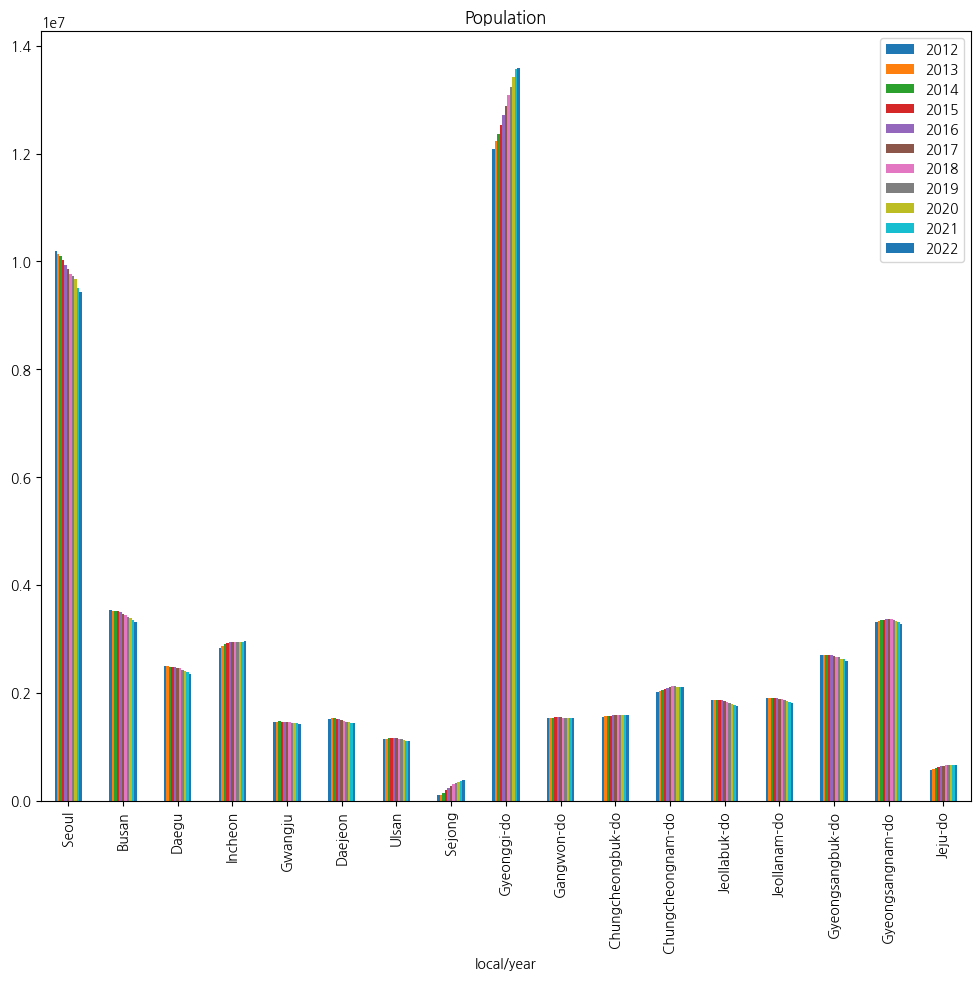

In [14]:
population.plot(kind="bar", figsize=(12, 10), title="Population")

- 2014년 서울 인구는 감소하고 인천 경기도 그리고 세종은 인구가 증가
- 이외 다른 시도는 큰 변경이 없음 => 서울에서 경기나 인천으로 이동했을 것으로 추정 => 증가분과 감소분이 차이가 있어 보임
- 2014년에서 2013년 인구의 차이를 구해보자.

In [15]:
population2014 - population2013

local/year
Seoul                -40412
Busan                 -8234
Daegu                 -8324
Incheon               22826
Gwangju                2974
Daejeon               -1002
Ulsan                  9897
Sejong                33972
Gyeonggi-do          123200
Gangwon-do             2179
Chungcheongbuk-do      6201
Chungcheongnam-do     14642
Jeollabuk-do          -1405
Jeollanam-do          -1392
Gyeongsangbuk-do       1354
Gyeongsangnam-do      16437
Jeju-do               13540
dtype: int64

- 서울은 4만명이 줄어든 반면, 인천, 경기도는 각각 2만, 13만명이 늘었음
- 좀 더 다각적인 데이터를 확인하기 위해서 출생자 수에서 사망자 수를 합하면, 순수 증감수를 알 수 있음

In [16]:
birth - death

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
local/year,,,,,,,,,,,
Seoul,52400,42003,41558,39952,31996,22457,12855,9844,1923,-3267,-12694
Busan,8139,5735,5960,5825,3832,46,-3418,-5211,-7892,-9085,-13579
Daegu,9120,6809,6719,6357,4796,2317,330,-519,-3267,-3899,-7458
Incheon,14900,12521,12377,12039,9490,6155,4771,3391,351,-1546,-4493
Gwangju,7518,5838,5794,4998,4333,2560,1324,729,-467,-25,-1904
Daejeon,8699,7465,7398,6813,5478,3822,1934,908,-91,-475,-1625
Ulsan,7593,6459,6861,6817,5963,4495,2800,2271,1315,634,-970
Sejong,234,299,491,1729,2232,2345,2444,2598,2151,2216,1531
Gyeonggi-do,73916,61170,60744,60490,50428,37236,28125,22630,14943,8740,-3687


<Axes: title={'center': 'Population'}, xlabel='local/year'>

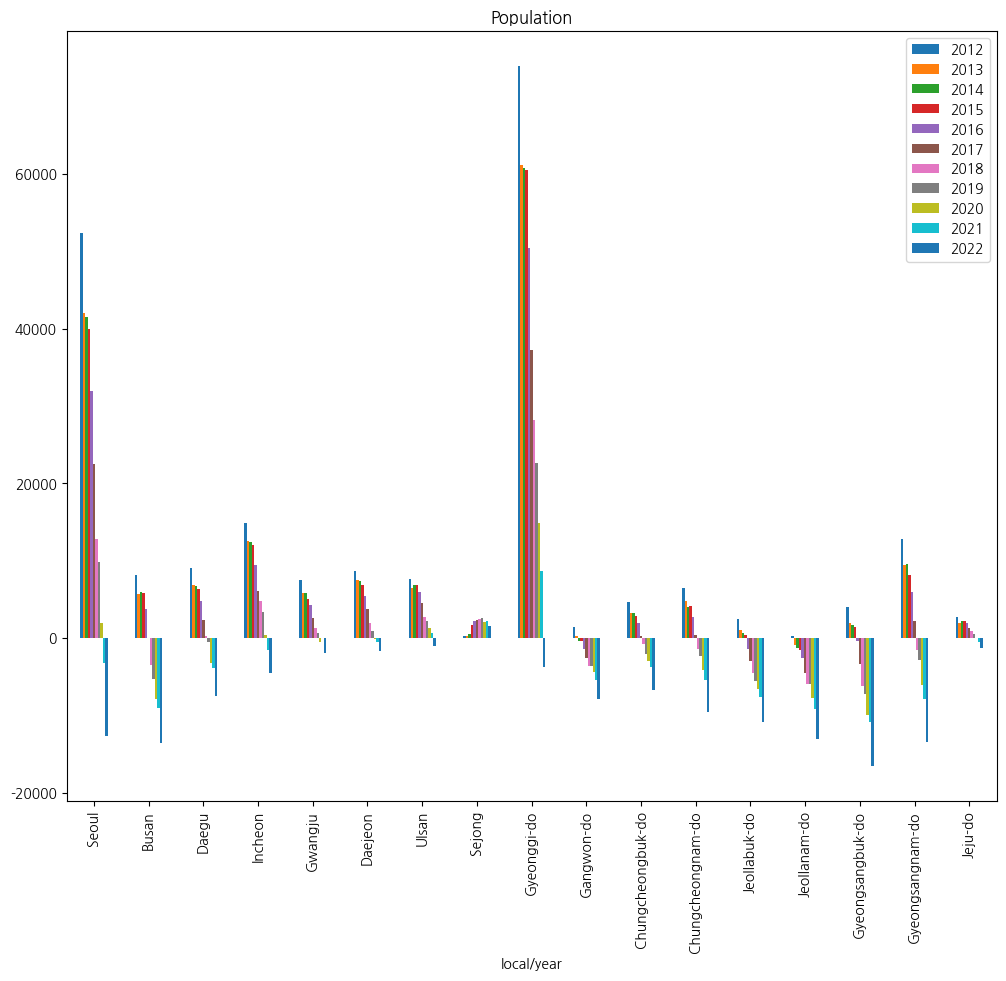

In [17]:
(birth - death).plot(kind="bar", figsize=(12, 10), title="Population")

- 2014년 서울에서 출생, 사망으로 증가한 인구수는 4만명 증가했지만, 결과적으로 2013년보다 줄어듬
- 경기도는 출생, 사망으로 6만600명이 증가했기 때문에 외부에서 6만명이 추가적으로 유입
- 추가적으로 강원도는 300명 출생수보다 사망자수가 더 많아 인구가 줄어들 수 있는 지역임을 알 수 있음
- 전체 데이터를 시각적으로 확인하기 위해서 전체 인구로 각 시도 인구를 나누면 각 지역에 백분율 비율을 구할 수 있음

<Axes: title={'center': '2012 Population'}, ylabel='2012'>

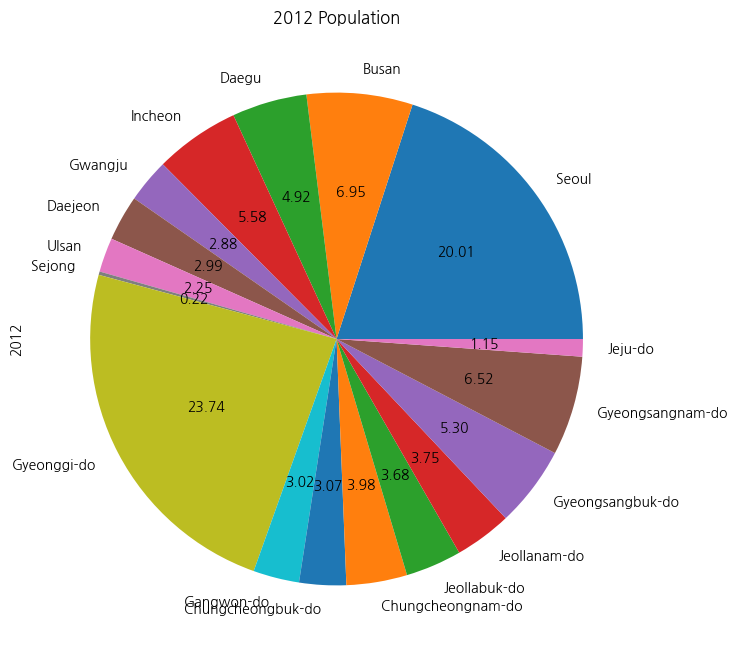

In [18]:
population2012_pie = population2012.astype(float) / population2012.sum() * 100
population2012_pie.plot(
    kind="pie", autopct="%.2f", figsize=(8, 8), title="2012 Population"
)

- 서울, 경기도, 인천의 합이 약 50%
- 같은 방법으로 2022년 시도별 인구 비율 구하면, 2012년과 2022년에서 가장 변화가 큰 시도를 구할 수 있음

<Axes: title={'center': '2022 Population'}, ylabel='2022'>

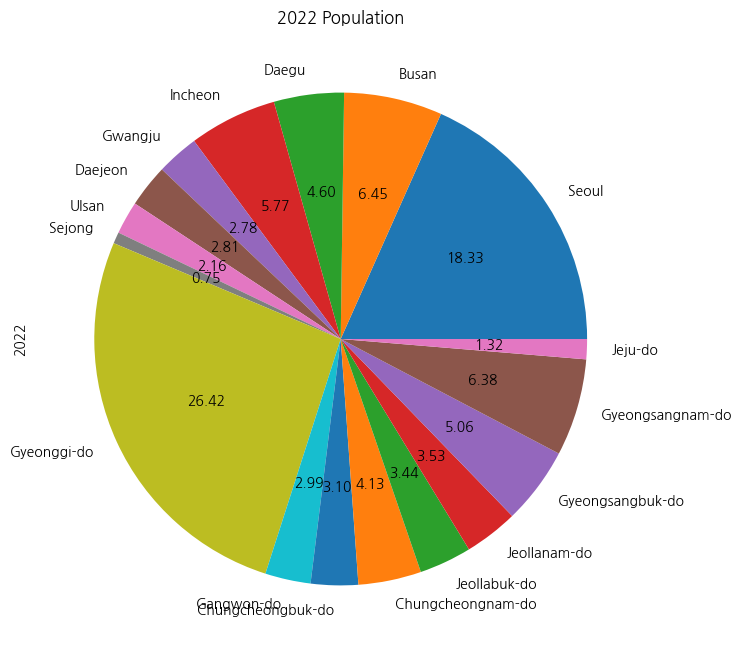

In [19]:
population2022_pie = population2022.astype(float) / population2022.sum() * 100
population2022_pie.plot(
    kind="pie", autopct="%.2f", figsize=(8, 8), title="2022 Population"
)

- 인구 비율로, 서울은 가장 감소가 큰 지역이며, 경기도는 가장 증가가 큰 지역이다. 서울을 중심으로 한 지역 편중은 사라지지 않고 있으며, 서울을 중심으로 경기도 지역으로 인구 이동이 있다는 점을 유추할 수 있음

In [20]:
population2022_pie - population2012_pie

local/year
Seoul               -1.681901
Busan               -0.495260
Daegu               -0.322885
Incheon              0.186508
Gwangju             -0.101710
Daejeon             -0.181179
Ulsan               -0.092622
Sejong               0.523696
Gyeonggi-do          2.682093
Gangwon-do          -0.032958
Chungcheongbuk-do    0.027895
Chungcheongnam-do    0.145255
Jeollabuk-do        -0.236745
Jeollanam-do        -0.214459
Gyeongsangbuk-do    -0.240777
Gyeongsangnam-do    -0.137628
Jeju-do              0.172677
dtype: float64

## 예측

In [21]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

- 회귀분석은 주어진 속성(입력 변수)와 목적 변수가 긴밀하게 관계돼 있을 때, 사용할 수 있는 방법으로 관찰된 현상과 그 현상에 영향을 미치는 변수들간의 통계 모델을 만들고, 모델로 새로운 입력 변수에 따른 목적 변수를 예측하는 분석법
- 회귀 분석으로 2023년, 2024년 인구를 예측
    - 먼저, 회귀분석으로 예측하기 위해 statsmodels 라이브러리를 사용
    - statsmodels 라이브러리는 일반최소제곱(Ordinary Least Squares) 기법을 제공

- 간단한 f를 정의
    - t = 전체 : pop2022 - pop2021
        - i = 서울로 들어 오는 인구 : trans2022
        - o = 서울로 나가는 인구 : trans2022
        - b = 서울에서 태어난 인구 : brith2022
        - d = 서울에서 사망한 인구 : death2022

In [22]:
s2022 = population2022["Seoul"]
s2021 = population2021["Seoul"]
print(s2022, s2021)
print(s2022 - s2021)

9428372 9509458
-81086


In [23]:
i = trans2022.loc["Seoul", :].sum()
o = trans2022.loc[:, "Seoul"].sum()
(i, o)
i - o

np.int64(-8822)

In [24]:
b = birth2022["Seoul"]
d = death2022["Seoul"]
(b, d)

(np.int64(42602), np.int64(55296))

In [25]:
(s2022 - s2021 + (i - o + b - d))

np.int64(-102602)

In [26]:
population.sum()

2012    50948272
2013    51141463
2014    51327916
2015    51529338
2016    51696216
2017    51778544
2018    51826059
2019    51849861
2020    51829023
2021    51638809
2022    51439038
dtype: int64

In [27]:
def predict(df, year):
    X = np.array(range(2012, 2023))
    X = sm.add_constant(X)
    n, m = df.shape
    l = []
    for i in range(0, n):
        y = df.iloc[i, :].values
        est = sm.OLS(y, X).fit()
        l.append(float(est.predict(np.array([1, year]))))
    return pd.Series(l, index=df.index)

In [28]:
population_predict = population.copy()
population_predict["2023"] = predict(population, 2023)
population_predict["2024"] = predict(population, 2024)
print(population_predict.sum())

2012   50,948,272.00
2013   51,141,463.00
2014   51,327,916.00
2015   51,529,338.00
2016   51,696,216.00
2017   51,778,544.00
2018   51,826,059.00
2019   51,849,861.00
2020   51,829,023.00
2021   51,638,809.00
2022   51,439,038.00
2023   51,912,272.13
2024   51,973,339.62
dtype: float64


C:\Users\sigma\AppData\Local\Temp\ipykernel_7820\2056355179.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l.append(float(est.predict(np.array([1, year]))))
C:\Users\sigma\AppData\Local\Temp\ipykernel_7820\2056355179.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l.append(float(est.predict(np.array([1, year]))))


In [29]:
population_predict

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
local/year,,,,,,,,,,,,,
Seoul,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372,"9,390,662.75","9,314,054.35"
Busan,3538484,3527635,3519401,3513777,3498529,3470653,3441453,3413841,3391946,3350380,3317812,"3,319,354.11","3,297,065.99"
Daegu,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031,2418346,2385412,2363691,"2,372,945.25","2,359,112.46"
Incheon,2843981,2879782,2902608,2925815,2943069,2948542,2954642,2957026,2942828,2948375,2967314,"2,987,763.38","2,997,633.31"
Gwangju,1469216,1472910,1475884,1472199,1469214,1463770,1459336,1456468,1450062,1441611,1431050,"1,436,438.25","1,432,485.24"
Daejeon,1524583,1532811,1531809,1518775,1514370,1502227,1489936,1474870,1463882,1452251,1446072,"1,439,372.18","1,430,001.09"
Ulsan,1147256,1156480,1166377,1173534,1172304,1165132,1155623,1148019,1136017,1121592,1110663,"1,124,019.29","1,119,643.76"
Sejong,113117,122153,156125,210884,243048,280100,314126,340575,355831,371895,383591,"441,817.69","471,644.20"
Gyeonggi-do,12093299,12234630,12357830,12522606,12716780,12873895,13077153,13239666,13427014,13565450,13589432,"13,852,849.91","14,014,722.55"


<Axes: title={'center': 'Population 2023, 2024'}, xlabel='local/year'>

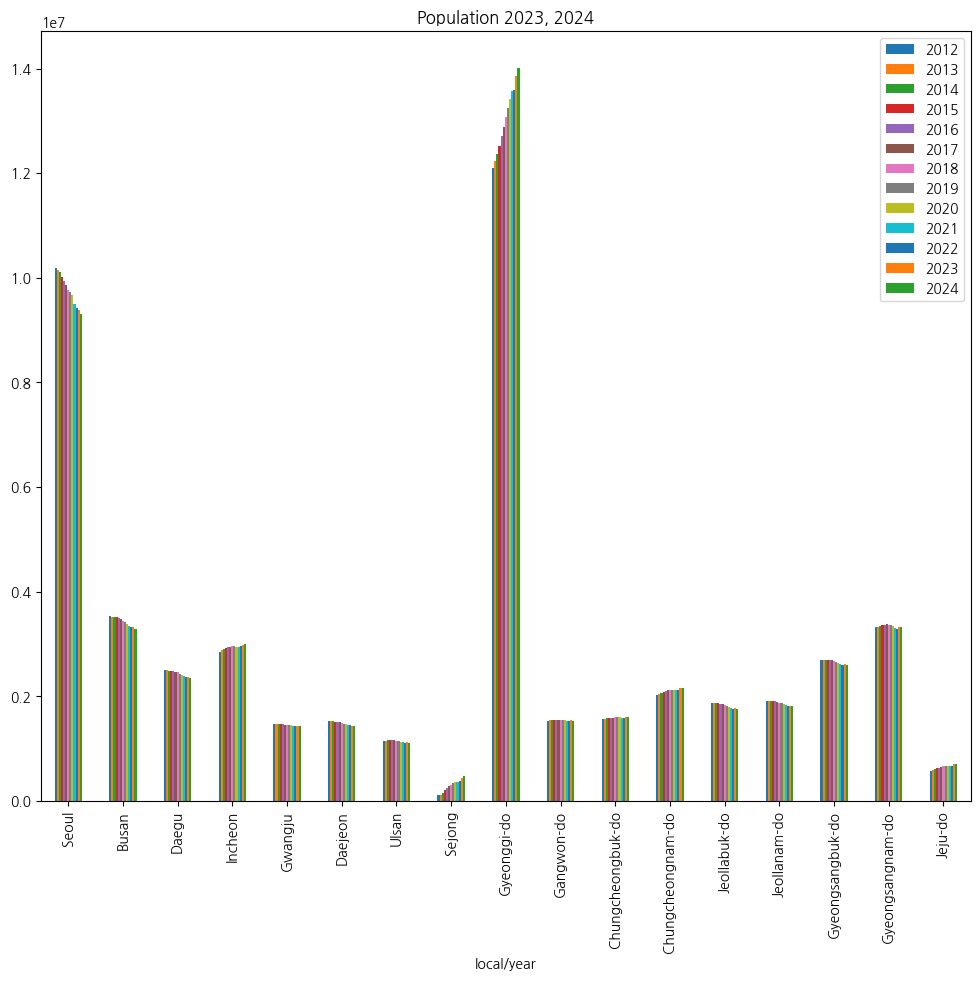

In [30]:
population_predict.plot(kind="bar", figsize=(12, 10), title="Population 2023, 2024")

In [31]:
birth_predict = birth.copy()
birth_predict["2023"] = predict(birth, 2023)
birth_predict["2024"] = predict(birth, 2024)
birth_predict

C:\Users\sigma\AppData\Local\Temp\ipykernel_7820\2056355179.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l.append(float(est.predict(np.array([1, year]))))
C:\Users\sigma\AppData\Local\Temp\ipykernel_7820\2056355179.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l.append(float(est.predict(np.array([1, year]))))


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
local/year,,,,,,,,,,,,,
Seoul,93914,84066,83711,83005,75536,65389,58074,53673,47445,45531,42602,"34,142.87","28,728.11"
Busan,28673,25831,26190,26645,24906,21480,19152,17049,15058,14446,14134,"11,601.62","9,996.37"
Daegu,21472,19340,19361,19438,18298,15946,14400,13233,11193,10661,10134,"8,558.65","7,356.67"
Incheon,27781,25560,25786,25491,23609,20445,20087,18522,16040,14947,14464,"12,662.82","11,247.05"
Gwangju,14392,12729,12729,12441,11580,10120,9105,8364,7318,7956,7446,"5,979.05","5,245.56"
Daejeon,15279,14099,13962,13774,12436,10851,9337,8410,7481,7414,7677,"5,628.00","4,736.91"
Ulsan,12160,11330,11556,11732,10910,9381,8149,7539,6617,6127,5399,"4,777.40","4,044.85"
Sejong,1054,1111,1344,2708,3297,3504,3703,3819,3468,3570,3209,"4,413.96","4,683.15"
Gyeonggi-do,124746,112129,112169,113495,105643,94088,88175,83198,77737,76139,75323,"65,398.38","60,194.45"


2012   484,550.00
2013   436,455.00
2014   435,435.00
2015   438,420.00
2016   406,243.00
2017   357,771.00
2018   326,822.00
2019   302,676.00
2020   272,337.00
2021   260,562.00
2022   249,186.00
2023   212,554.55
2024   187,821.86
dtype: float64


<Axes: title={'center': 'birth 2023, 2024'}, xlabel='local/year'>

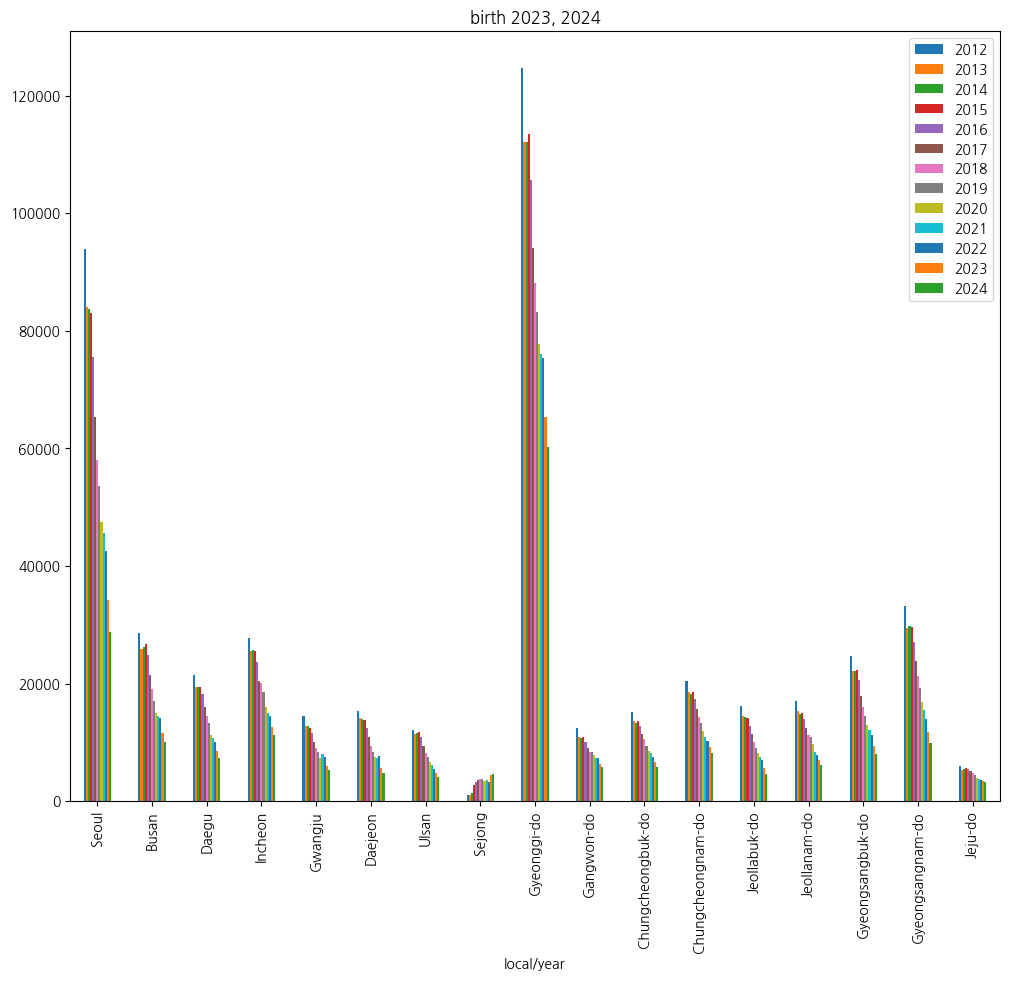

In [32]:
print(birth_predict.sum())
birth_predict.plot(kind="bar", figsize=(12, 10), title="birth 2023, 2024")

- 2022년 총 출생자 수는 249,186명으로, 2012년 20만 명이상 감소
- 2024년은 2022년 기준으로 약 6만명 감소

- 시도별 인구 이동을 기반으로 시도별 인구 분포를 예측
    - 마코프 체인을 활용
    - 마코프 체인은 단위 시간에 따른 상태 변화를 나타내는데, 매 단위 시간마다 상태가 변이되거나 유지되며, 상태 변이를 전이라 함
    - 전이는 상태전이확률(state transition probability) 행렬로 나타내며, 이를 바탕으로 변화를 예측
    - 현재 상태에서 다음 상태로 전이될 때 이 상태전이확률로 확률적으로 전이
    - 2014년 각 시도의 이동 인구는 상태전이확률로 나타낼 수 있다. 즉, 2014년 서울에서 이동하여 다른 시도로 이동할 확률은 서울에서 떠난 전인구로 각 시도로 이동한 인구를 나누면, 상태전이확률을 구할 수 있음
    - 각 시도도 마찬가지로 시도에서 전출한 총인구를 각 다른 시도로 전입한 인구를 나누면 됨

In [37]:
trans2022_percent = trans2022.copy()
for i in range(0, 17):
    trans2022_percent.iloc[:, i] = (
        trans2022.iloc[:, i].astype(float) / trans2022.iloc[:, i].sum()
    )
trans2022_percent

C:\Users\sigma\AppData\Local\Temp\ipykernel_7820\4015714302.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'in/out
Seoul               0.59
Busan               0.02
Daegu               0.01
Incheon             0.03
Gwangju             0.01
Daejeon             0.01
Ulsan               0.01
Sejong              0.00
Gyeonggi-do         0.20
Gangwon-do          0.02
Chungcheongbuk-do   0.01
Chungcheongnam-do   0.02
Jeollabuk-do        0.01
Jeollanam-do        0.01
Gyeongsangbuk-do    0.02
Gyeongsangnam-do    0.02
Jeju-do             0.01
Name: Seoul, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  trans2022_percent.iloc[:, i] = (
C:\Users\sigma\AppData\Local\Temp\ipykernel_7820\4015714302.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'in/out
Seoul               0.04
Busan            

,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Gyeonggi\n-do,Gangwon\n-do,Chungcheong\nbuk-do,Chungcheong\nnam-do,Jeollabuk\n-do,Jeollanam\n-do,Gyeongsang\nbuk-do,Gyeongsang\nnam-do,Jeju-do
in/out,,,,,,,,,,,,,,,,,
Seoul,0.59,0.04,0.04,0.12,0.04,0.06,0.04,0.09,0.18,0.11,0.07,0.08,0.06,0.06,0.05,0.04,0.11
Busan,0.02,0.68,0.02,0.01,0.01,0.01,0.09,0.02,0.01,0.01,0.01,0.01,0.01,0.02,0.03,0.14,0.03
Daegu,0.01,0.02,0.64,0.01,0.00,0.01,0.03,0.02,0.01,0.01,0.01,0.01,0.00,0.01,0.16,0.02,0.02
Incheon,0.03,0.01,0.01,0.57,0.01,0.01,0.01,0.02,0.04,0.03,0.02,0.03,0.02,0.02,0.01,0.01,0.03
Gwangju,0.01,0.00,0.00,0.01,0.64,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.03,0.16,0.00,0.00,0.01
Daejeon,0.01,0.01,0.01,0.01,0.01,0.57,0.01,0.16,0.01,0.01,0.05,0.06,0.02,0.01,0.01,0.01,0.01
Ulsan,0.01,0.03,0.01,0.00,0.00,0.00,0.60,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.03,0.02,0.01
Sejong,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.33,0.00,0.00,0.02,0.02,0.01,0.00,0.00,0.00,0.00
Gyeonggi-do,0.20,0.03,0.04,0.19,0.04,0.07,0.04,0.10,0.63,0.16,0.13,0.16,0.08,0.07,0.07,0.04,0.12


- 서울에서 서울로 전이 확률은 $0.599$, 서울에서 부산으로 전이 확률은 $0.02$, 서울에서 대구로 전이 확률은 $0.01$
- 이 상태전이확률을 이용하여 다음 상태를 구할 수 있음 => $X_{1} = T * X_{0}$로, 내년 인구 $X_{1}$는 상태전이확률 $T$와 현재 인구 $X_{0}$의 내적으로 구할 수 있음

In [38]:
pd.Series(np.dot(trans2022_percent, population2022), index=trans2022.index)

in/out
Seoul                9,770,837.12
Busan                3,505,609.21
Daegu                2,480,057.09
Incheon              2,867,366.92
Gwangju              1,561,376.03
Daejeon              1,549,372.04
Ulsan                1,137,238.28
Sejong                 382,488.00
Gyeonggi-do         12,914,091.78
Gangwon-do           1,521,104.04
Chungcheongbuk-do    1,544,788.58
Chungcheongnam-do    2,031,319.22
Jeollabuk-do         1,804,324.46
Jeollanam-do         1,761,857.89
Gyeongsangbuk-do     2,605,664.62
Gyeongsangnam-do     3,320,980.32
Jeju-do                680,562.40
dtype: float64

In [47]:
(
    pd.Series(np.dot(trans2022_percent, population2022), index=trans2022.index)
    - population2022
)

in/out
Seoul                342,465.12
Busan                187,797.21
Daegu                116,366.09
Incheon              -99,947.08
Gwangju              130,326.03
Daejeon              103,300.04
Ulsan                 26,575.28
Sejong                -1,103.00
Gyeonggi-do         -675,340.22
Gangwon-do           -15,393.96
Chungcheongbuk-do    -50,269.42
Chungcheongnam-do    -91,717.78
Jeollabuk-do          34,717.46
Jeollanam-do         -55,839.11
Gyeongsangbuk-do       5,172.62
Gyeongsangnam-do      40,487.32
Jeju-do                2,403.40
dtype: float64

- 예측 결과와 2022년 인구의 차를 구하면, 2022년보다 서울, 부산, 대구는 증가하고, 인천, 경기도는 감소
- 이전에 시도별 인구 예측과 다른 결과
- 왜?
    - 1) 인구 이동이 시도별로 제한되어 있지 않고 해외로 이동 할 수 있음
    - 2) 좀 더 정확한 통계 데이터가 있었다면, 좀 더 정확한 인구 이동을 예측할 수 있음
- 오차를 감안하고, 좀 더 진행

In [48]:
population_trans_10 = pd.Series(
    np.dot(np.linalg.matrix_power(trans2022_percent, 10), population2022),
    index=trans2022.index,
)
population_trans_10

in/out
Seoul                9,583,711.88
Busan                4,035,160.79
Daegu                2,755,036.14
Incheon              2,620,567.07
Gwangju              1,772,009.16
Daejeon              1,635,241.08
Ulsan                1,242,147.43
Sejong                 380,625.97
Gyeonggi-do         11,830,243.09
Gangwon-do           1,452,452.31
Chungcheongbuk-do    1,462,715.57
Chungcheongnam-do    1,910,808.95
Jeollabuk-do         1,868,923.60
Jeollanam-do         1,813,847.21
Gyeongsangbuk-do     2,760,675.42
Gyeongsangnam-do     3,627,329.44
Jeju-do                687,542.90
dtype: float64

In [49]:
population_trans_40 = pd.Series(
    np.dot(np.linalg.matrix_power(trans2022_percent, 40), population2022),
    index=trans2022.index,
)
population_trans_40

in/out
Seoul                9,515,405.90
Busan                4,108,709.06
Daegu                2,786,914.64
Incheon              2,598,500.56
Gwangju              1,778,599.39
Daejeon              1,627,679.62
Ulsan                1,259,765.50
Sejong                 378,880.13
Gyeonggi-do         11,741,061.33
Gangwon-do           1,443,122.07
Chungcheongbuk-do    1,455,202.88
Chungcheongnam-do    1,900,294.83
Jeollabuk-do         1,863,544.92
Jeollanam-do         1,820,304.92
Gyeongsangbuk-do     2,787,467.64
Gyeongsangnam-do     3,686,145.10
Jeju-do                687,439.52
dtype: float64

# 정확하지 않은데?
- 알고리즘이 아무리 정확해도, 데이터가 반영되지 못하면 문제가 발생
- 데이터가 아무리 정확해도, 어리숙한 알고리즘을 사용하면 문제가 발생